<a href="https://colab.research.google.com/github/jayavardhan18112000/Regularization-using-Diabetes-dataset/blob/main/Lasso_Ridge_Elastic_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge

In [2]:
from sklearn.datasets import load_diabetes
df = load_diabetes()

In [3]:
df.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
df.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [6]:
df.data.shape

(442, 10)

The data set have 442 rows and 10 columns


In [7]:
df.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [8]:
modified_data=pd.DataFrame(data=df.data,columns=df.feature_names)

In [9]:
modified_data['target']=df.target

In [10]:
modified_data.shape

(442, 11)

<Axes: >

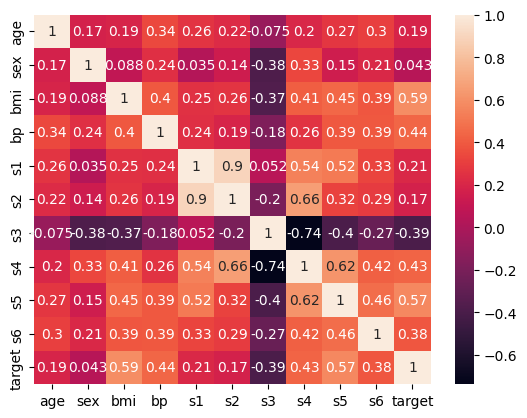

In [11]:
import seaborn as sns
sns.heatmap(modified_data.corr(),annot=True)

In [12]:
x=modified_data.drop('target',axis=1)
y=modified_data['target']

In [13]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter= PolynomialFeatures(degree=2, include_bias=False)
poly_features= polynomial_converter.fit_transform(x)

In [14]:
poly_features.shape

(442, 65)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [16]:
scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [17]:
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [18]:
ridge_model= Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
y_pred= ridge_model.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
pd.DataFrame([mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))], index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,45.813153
MSE,3450.837307
RMSE,58.743828


Testing accuracy : 0.44386



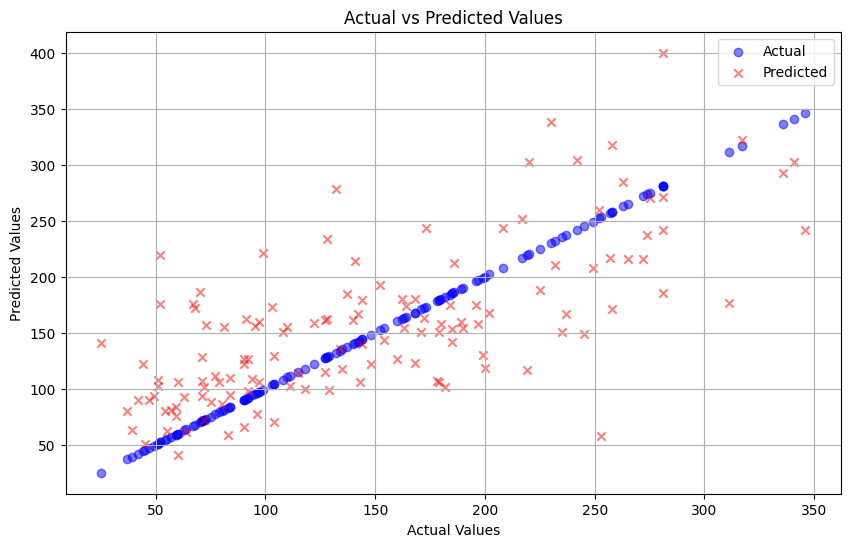

In [20]:
print('Testing accuracy : {}\n'.format(r2_score(y_test, y_pred).round(5)))

# Assuming y_test and y_pred are your test and predicted values

plt.figure(figsize=(10, 6))

# Plot Actual values in blue
plt.scatter(y_test, y_test, c='blue', label='Actual', marker='o', alpha=0.5)

# Plot Predicted values in red
plt.scatter(y_test, y_pred, c='red', label='Predicted', marker='x', alpha=0.5)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()



In [21]:
from sklearn.linear_model import RidgeCV

from sklearn.linear_model import LassoCV

from sklearn.linear_model import ElasticNetCV

In [22]:
#Train the Model

ridge_cv_model=RidgeCV(alphas=(0.1, 1.0, 30.0,40.0,50.0), scoring='neg_mean_absolute_error')

In [23]:
ridge_cv_model.fit(X_train, y_train)

print("The optimal value of Ridge Regression alpha is: ", ridge_cv_model.alpha_)

The optimal value of Ridge Regression alpha is:  40.0


In [24]:
y_pred_ridge= ridge_cv_model.predict(X_test)


In [25]:
pd.DataFrame([mean_absolute_error(y_test,y_pred_ridge), mean_squared_error(y_test,y_pred_ridge),np.sqrt(mean_squared_error(y_test,y_pred_ridge))], index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,45.477417
MSE,3268.859717
RMSE,57.173943


In [26]:
li=[]
li=ridge_cv_model.coef_
count_ridge = 0
for i in li:
    if i!=0:
        count_ridge+=1
print("After ridge Regression, we have only ", count_ridge , " none-zero coefficients.")

After ridge Regression, we have only  65  none-zero coefficients.


In [27]:
lasso_cv_model= LassoCV(eps=0.1, n_alphas=10000, cv=5)

In [28]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=5, eps=0.1, n_alphas=10000)

In [29]:
print("The optimal value of alpha for Lasso Regression is: "
      , lasso_cv_model.alpha_)

The optimal value of alpha for Lasso Regression is:  4.417463265029617


In [30]:
y_pred_lasso= lasso_cv_model.predict(X_test)

Testing accuracy : 0.48516



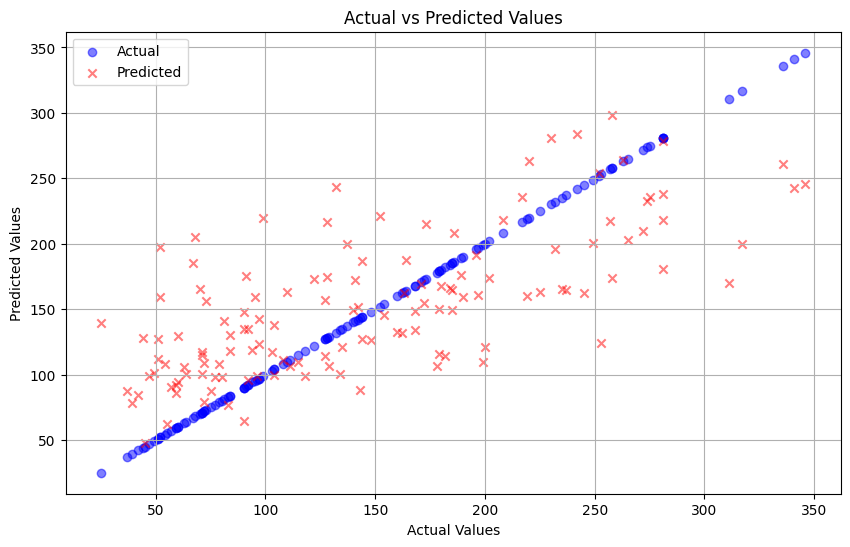

In [31]:
print('Testing accuracy : {}\n'.format(r2_score(y_test, y_pred_lasso).round(5)))
plt.figure(figsize=(10, 6))

# Plot Actual values in blue
plt.scatter(y_test, y_test, c='blue', label='Actual', marker='o', alpha=0.5)

# Plot Predicted values in red
plt.scatter(y_test, y_pred_lasso, c='red', label='Predicted', marker='x', alpha=0.5)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

In [32]:
pd.DataFrame([mean_absolute_error(y_test,y_pred_lasso), mean_squared_error(y_test,y_pred_lasso),np.sqrt(mean_squared_error(y_test,y_pred_lasso))], index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,45.534948
MSE,3194.560181
RMSE,56.520440


In [33]:
l=[]
l=lasso_cv_model.coef_
count_lasso = 0
for i in l:
    if i!=0:
        count_lasso+=1
print("After ridge Regression, we have only ", count_lasso , " none-zero coefficients.")

After ridge Regression, we have only  11  none-zero coefficients.


In [34]:
elastic_model= ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],cv=5, max_iter=10000)

In [35]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=10000)

In [36]:
elastic_model.l1_ratio_

0.99

In [37]:
y_pred_elastic=elastic_model.predict(X_test)

Testing accuracy : 0.48723



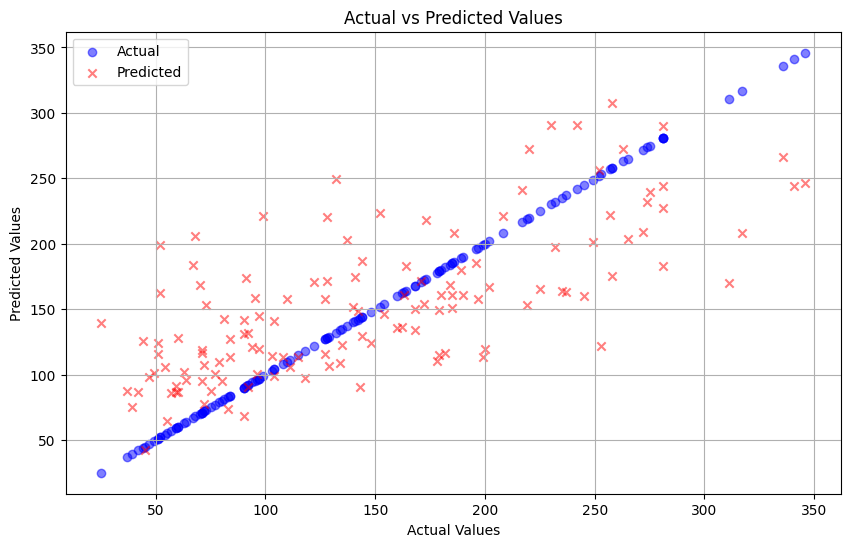

In [38]:
print('Testing accuracy : {}\n'.format(r2_score(y_test, y_pred_elastic).round(5)))
plt.figure(figsize=(10, 6))

# Plot Actual values in blue
plt.scatter(y_test, y_test, c='blue', label='Actual', marker='o', alpha=0.5)

# Plot Predicted values in red
plt.scatter(y_test, y_pred_elastic, c='red', label='Predicted', marker='x', alpha=0.5)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

In [39]:
pd.DataFrame([mean_absolute_error(y_test,y_pred_elastic), mean_squared_error(y_test,y_pred_elastic),np.sqrt(mean_squared_error(y_test,y_pred_elastic))], index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,45.384907
MSE,3181.726980
RMSE,56.406799


In [40]:
lis=[]
lis=elastic_model.coef_
count_elastic = 0
for i in lis:
    if i!=0:
        count_elastic+=1
print("After elastic Regression, we have only ", count_elastic , " non-zero coefficients.")

After elastic Regression, we have only  16  non-zero coefficients.


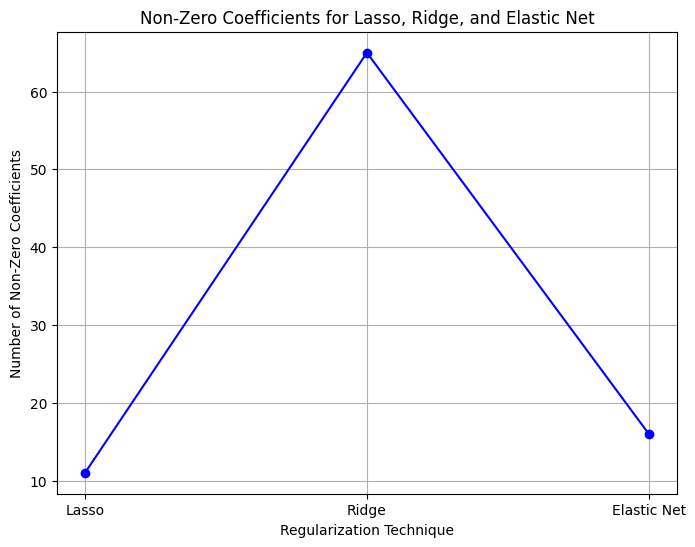

In [41]:
data = {
    'Regularization': ['Lasso', 'Ridge', 'Elastic Net'],
    'Non-Zero Coefficients': [11, 65, 16]
}

a = pd.DataFrame(data)

# Create a line chart
plt.figure(figsize=(8, 6))
plt.plot(a['Regularization'], a['Non-Zero Coefficients'], marker='o', linestyle='-', color='b')
plt.title('Non-Zero Coefficients for Lasso, Ridge, and Elastic Net')
plt.xlabel('Regularization Technique')
plt.ylabel('Number of Non-Zero Coefficients')
plt.grid(True)
plt.show()

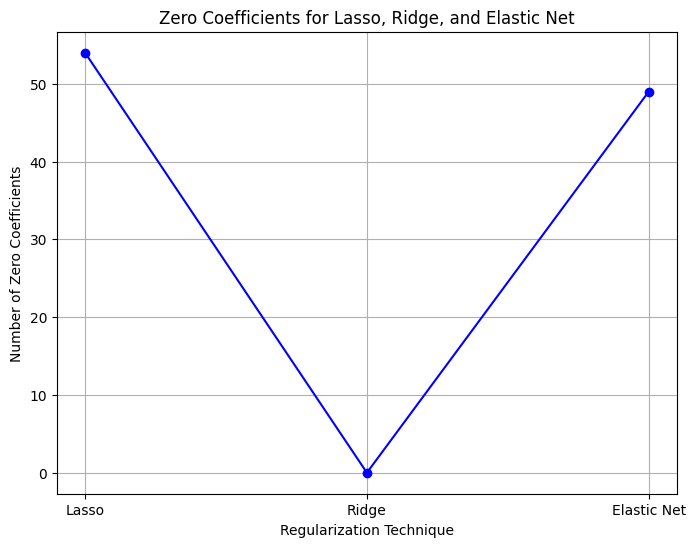

In [42]:
data = {
    'Regularization': ['Lasso', 'Ridge', 'Elastic Net'],
    'Zero Coefficients': [65-11, 65-65, 65-16]
}

a = pd.DataFrame(data)

# Create a line chart
plt.figure(figsize=(8, 6))
plt.plot(a['Regularization'], a['Zero Coefficients'], marker='o', linestyle='-', color='b')
plt.title('Zero Coefficients for Lasso, Ridge, and Elastic Net')
plt.xlabel('Regularization Technique')
plt.ylabel('Number of Zero Coefficients')
plt.grid(True)
plt.show()